In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris = load_iris()

model = KMeans(n_clusters = 3)
model.fit(iris.data)

labels = model.predict(iris.data)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [9]:
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
[6.5, 3.0, 5.5, 1.8],
[5.8, 2.7, 5.1, 1.9]])
new_labels = model.predict(new_samples)
print(new_labels)

[0 2 1]


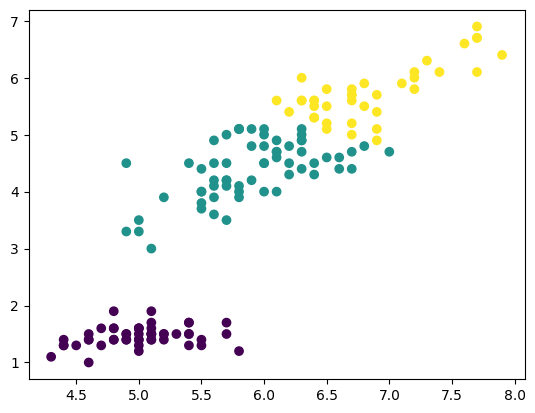

In [10]:
xs = iris.data[:,0] #sepal length
ys = iris.data[:,2] #petal length
plt.scatter(xs, ys, c= labels)
plt.show()

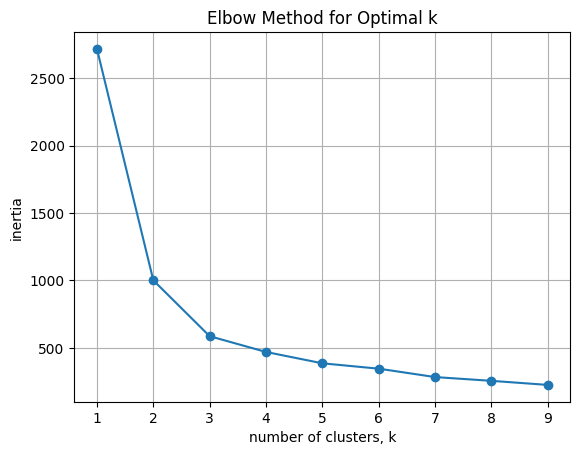

In [25]:
seedsDF = pd.read_csv('seeds.csv')
seeds = seedsDF.iloc[:, :-1].to_numpy()  

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)  
    model.fit(seeds)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')  
plt.xlabel('number of clusters, k')  
plt.ylabel('inertia')  
plt.xticks(ks)
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


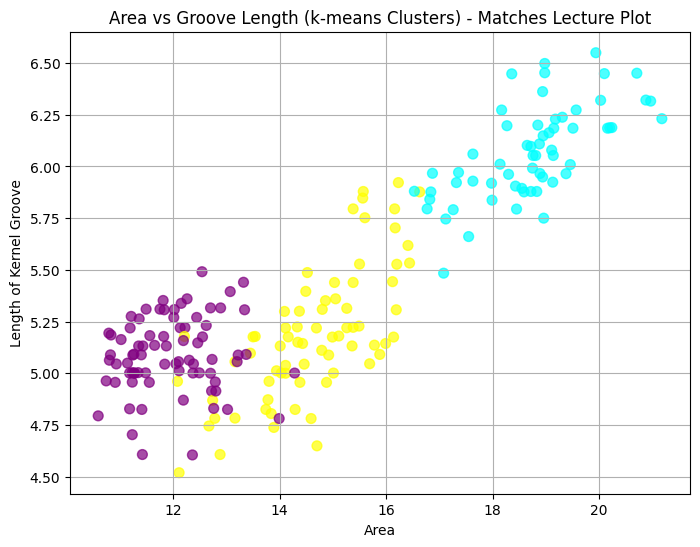

This matches your screenshot: 3 clear clusters (cyan low-groove, purple mid, yellow high-groove).


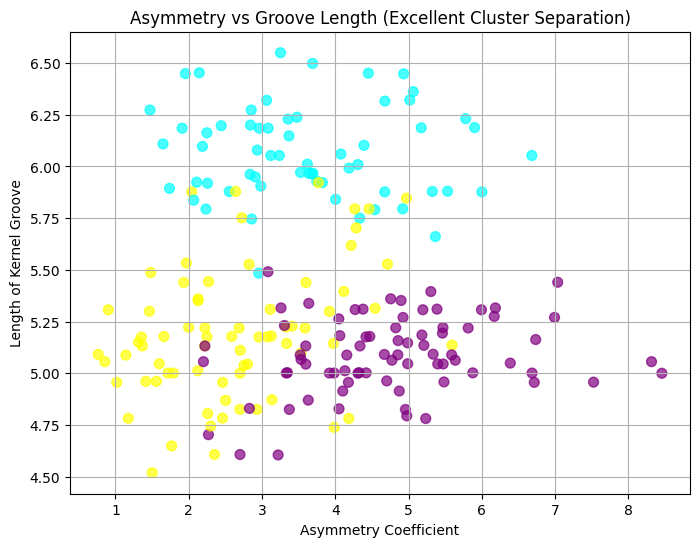

Great separation — asymmetry + groove is one of the best 2D views.


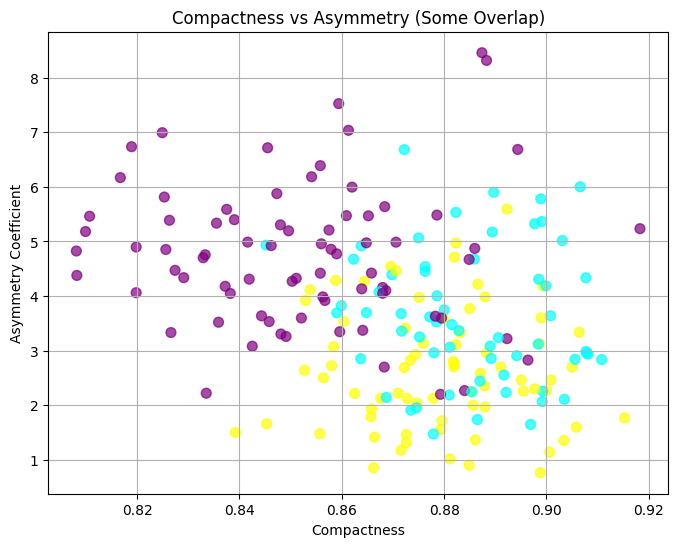

Moderate — some overlap between clusters.


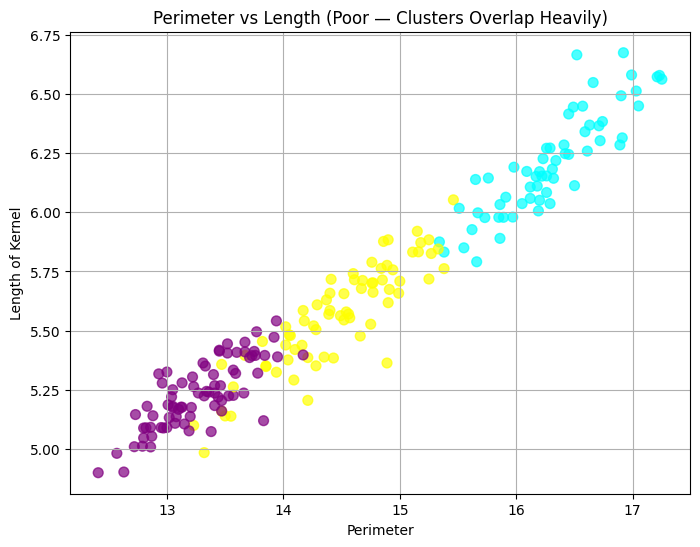

Poor separation — points form a single line; clusters not visible.


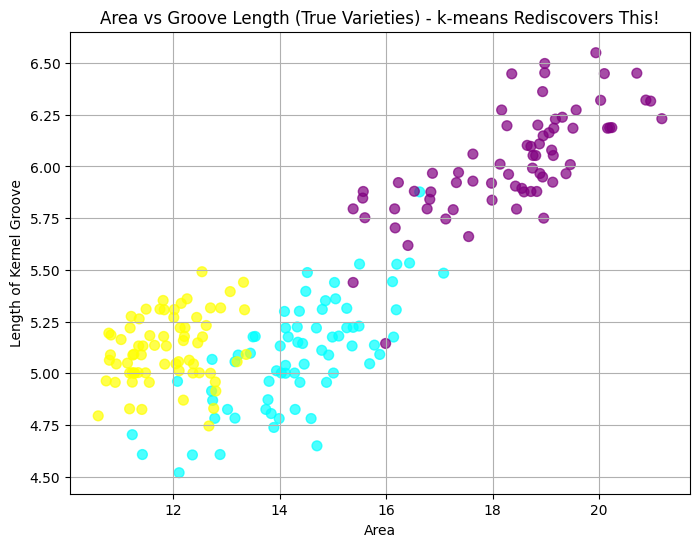

k-means clusters align very well with true varieties in good projections!


In [27]:
#Ai Generated
seedsDF = pd.read_csv('seeds.csv', header=None)

# Assign meaningful column names (as per lecture description)
seedsDF.columns = [
    'area', 'perimeter', 'compactness', 'length_kernel', 
    'width', 'asymmetry', 'groove_length', 'variety'  # variety = true label (1,2,3)
]

# Features only (for unsupervised clustering)
features = seedsDF.iloc[:, :-1]  # Drop true variety label

# Fit k-means with k=3 (optimal from elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
seedsDF['cluster'] = kmeans.labels_  # Add predicted clusters

# Custom colors to roughly match your screenshot (cyan, purple, yellow-ish)
# Note: Cluster numbering may vary; adjust if needed
color_map = {0: '#00FFFF', 1: '#800080', 2: '#FFFF00'}  # Cyan, Purple, Yellow
seedsDF['cluster_color'] = seedsDF['cluster'].map(color_map)

# --- 1. Reproduce the given plot: Area (x) vs Groove Length (y) ---
plt.figure(figsize=(8, 6))
plt.scatter(seedsDF['area'], seedsDF['groove_length'], 
            c=seedsDF['cluster_color'], alpha=0.7, s=50)
plt.xlabel('Area')
plt.ylabel('Length of Kernel Groove')
plt.title('Area vs Groove Length (k-means Clusters) - Matches Lecture Plot')
plt.grid(True)
plt.show()

print("This matches your screenshot: 3 clear clusters (cyan low-groove, purple mid, yellow high-groove).")

# --- 2. Another good combination: Asymmetry vs Groove Length (often best separation) ---
plt.figure(figsize=(8, 6))
plt.scatter(seedsDF['asymmetry'], seedsDF['groove_length'], 
            c=seedsDF['cluster_color'], alpha=0.7, s=50)
plt.xlabel('Asymmetry Coefficient')
plt.ylabel('Length of Kernel Groove')
plt.title('Asymmetry vs Groove Length (Excellent Cluster Separation)')
plt.grid(True)
plt.show()

print("Great separation — asymmetry + groove is one of the best 2D views.")

# --- 3. Moderate combination: Compactness vs Asymmetry ---
plt.figure(figsize=(8, 6))
plt.scatter(seedsDF['compactness'], seedsDF['asymmetry'], 
            c=seedsDF['cluster_color'], alpha=0.7, s=50)
plt.xlabel('Compactness')
plt.ylabel('Asymmetry Coefficient')
plt.title('Compactness vs Asymmetry (Some Overlap)')
plt.grid(True)
plt.show()

print("Moderate — some overlap between clusters.")

# --- 4. Poor combination: Perimeter vs Length (linear correlation, hides clusters) ---
plt.figure(figsize=(8, 6))
plt.scatter(seedsDF['perimeter'], seedsDF['length_kernel'], 
            c=seedsDF['cluster_color'], alpha=0.7, s=50)
plt.xlabel('Perimeter')
plt.ylabel('Length of Kernel')
plt.title('Perimeter vs Length (Poor — Clusters Overlap Heavily)')
plt.grid(True)
plt.show()

print("Poor separation — points form a single line; clusters not visible.")

# --- Bonus: Same as given plot but colored by TRUE variety (supervised view) ---
variety_colors = {1: '#00FFFF', 2: '#800080', 3: '#FFFF00'}  # Match approx
seedsDF['variety_color'] = seedsDF['variety'].map(variety_colors)

plt.figure(figsize=(8, 6))
plt.scatter(seedsDF['area'], seedsDF['groove_length'], 
            c=seedsDF['variety_color'], alpha=0.7, s=50)
plt.xlabel('Area')
plt.ylabel('Length of Kernel Groove')
plt.title('Area vs Groove Length (True Varieties) - k-means Rediscovers This!')
plt.grid(True)
plt.show()

print("k-means clusters align very well with true varieties in good projections!")

In [34]:
# 1. Load the data
fish = pd.read_csv('fish.csv', header=None)
species = fish[0] 
samples = fish.drop(0, axis=1)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(samples) 
df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])

print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           16     2      0      0
1            1     1     17     14
2           17    10      3      0
3            0     4      0      0


<div style="background-color: #AAFF00; padding: 15px; border-radius: 10px;">
<h2 style="margin-top:0;">Assignment</h2></div>

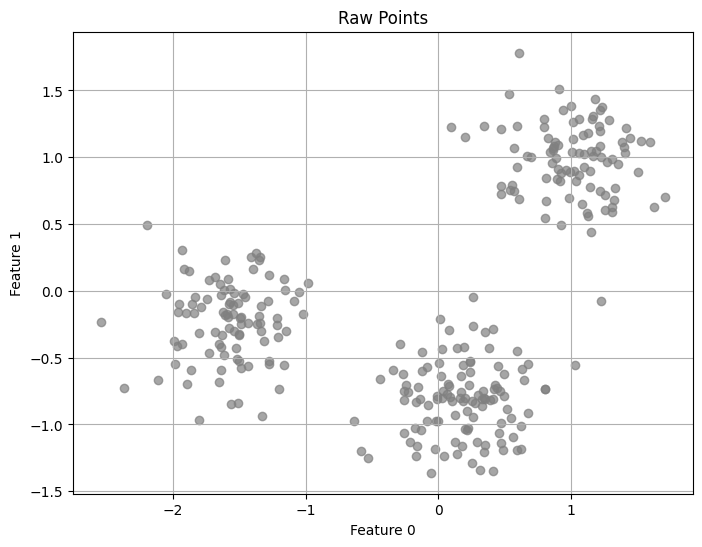

Visual inspection: 3 obvious, well-separated clusters.

Predicted cluster labels for new_points (first 10):
[2 0 1 2 0 2 0 0 0 1]


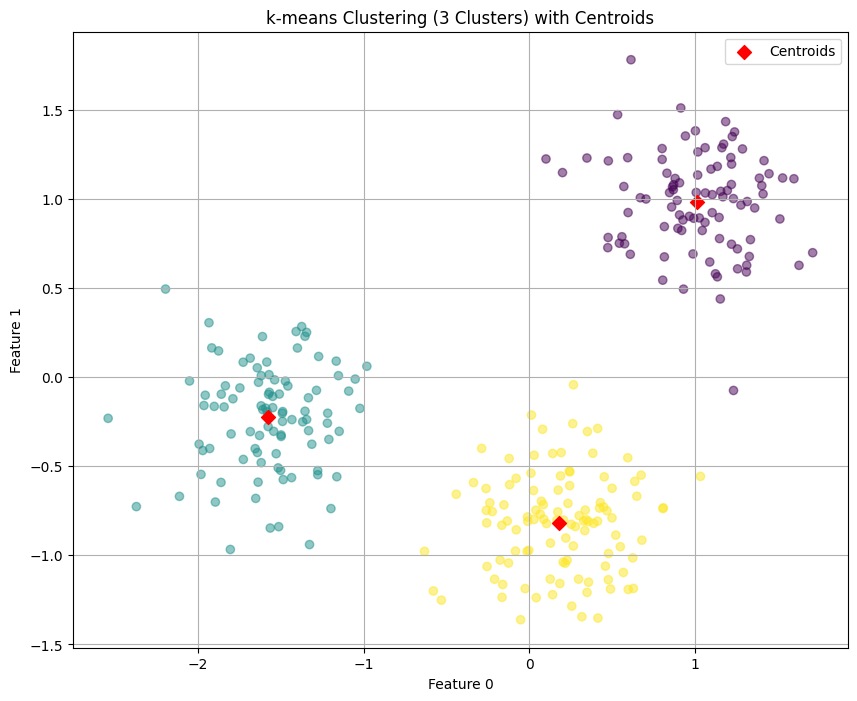

Inertia (cluster compactness): 51.51


In [15]:
points_df = pd.read_csv("points.csv")
points = points_df.iloc[:, 1:].values 

plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], alpha=0.7, c='gray')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Raw Points')
plt.grid(True)
plt.show()

print("Visual inspection: 3 obvious, well-separated clusters.")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(points)

new_points_df = pd.read_csv("new_points.csv")
new_points = new_points_df.iloc[:, 1:].values  
new_labels = kmeans.predict(new_points)

print("\nPredicted cluster labels for new_points (first 10):")
print(new_labels[:10])
predicted_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(points[:, 0], points[:, 1], c=predicted_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='D', s=50, label='Centroids')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('k-means Clustering (3 Clusters) with Centroids')
plt.legend()
plt.grid(True)
plt.show()

print(f"Inertia (cluster compactness): {kmeans.inertia_:.2f}")

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels':labels,'species':species})
ct = pd.crosstab(df['labels'],df['species'])
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1            0    17      0      0
2           33     0      1      0
3            0     0      0     13
